In [19]:
import sys
import os
import pandas as pd
import datetime as dt
from dotenv import load_dotenv
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
from sqlalchemy import create_engine
os.chdir('..')
from db_connection.connection import PostgresConnection
from src.df_cleaner import *
from src.df_outlier_handler import OutlierHandler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
db = PostgresConnection(dbname='postgres', user='postgres', password='postgres')
db.connect()

# load BOA App review data 
query = "SELECT * FROM review_data"
result = db.execute_query(query)

df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])

Connected to PostgreSQL database!


# General Statistics

In [4]:
df.size


4500

In [5]:
df.head()

,review_id,user_name,user_image,likes,review_created_version,created_at,reply_content,replied_at,app_version,score,comments,keywords,lda_category,sentiment,insight
0,738b6d3a-2d7f-4a82-bfe2-dcf32591f944,NAHOM NIGUSSIE,https://play-lh.googleusercontent.com/a-/ALV-U...,1,None,2024-05-21 18:38:28,None,None,None,2,Slow and buggy crashed all the time need a lot...,None,None,None,None
1,e20abe49-8fe7-42fe-af3a-91399875b21a,Abbatu Ermias,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.04.23,2024-05-21 05:06:05,None,None,24.04.23,5,Awe ሃረፍ nawe,None,None,None,None
2,55c833c8-a942-47bb-aaaa-e022f39e28af,Habtsh Darge,https://play-lh.googleusercontent.com/a/ACg8oc...,0,None,2024-05-20 08:07:49,None,None,None,1,በጣም ቀፋፊ አፕ ነው ። ሰርቶ አያውቅም ። በጣም ብዙ ችግር አለበት ከአ...,None,None,None,None
3,d62d6d95-2900-4038-aa26-c9b42835c971,Usman,https://play-lh.googleusercontent.com/a/ACg8oc...,0,None,2024-05-19 16:27:13,None,None,None,1,This application is very bad . Please modify t...,None,None,None,None
4,20c4de51-f5cd-41f3-b21a-efdf8cb4463e,Eskender Million,https://play-lh.googleusercontent.com/a-/ALV-U...,1,24.04.23,2024-05-17 20:37:40,None,None,24.04.23,1,"It has a very complex, inconvenient to use, an...",None,None,None,None


In [6]:
df.shape

(300, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               300 non-null    object
 1   user_name               300 non-null    object
 2   user_image              300 non-null    object
 3   likes                   300 non-null    int64 
 4   review_created_version  213 non-null    object
 5   created_at              300 non-null    object
 6   reply_content           0 non-null      object
 7   replied_at              0 non-null      object
 8   app_version             213 non-null    object
 9   score                   300 non-null    int64 
 10  comments                300 non-null    object
 11  keywords                0 non-null      object
 12  lda_category            0 non-null      object
 13  sentiment               0 non-null      object
 14  insight                 0 non-null      object
dtypes: int

In [8]:
df.describe()

,likes,score
count,300.000000,300.0000
mean,5.000000,3.2300
std,34.223738,1.8225
min,0.000000,1.0000
25%,0.000000,1.0000
50%,1.000000,4.0000
75%,1.000000,5.0000
max,549.000000,5.0000


# Missing Values

In [9]:
percent_missing_values(df)

The dataset contains 43.87 % missing values.


In [10]:
df.isnull().sum()

review_id                   0
user_name                   0
user_image                  0
likes                       0
review_created_version     87
created_at                  0
reply_content             300
replied_at                300
app_version                87
score                       0
comments                    0
keywords                  300
lda_category              300
sentiment                 300
insight                   300
dtype: int64

In [11]:
df = df.fillna(value = 0)
df

,review_id,user_name,user_image,likes,review_created_version,created_at,reply_content,replied_at,app_version,score,comments,keywords,lda_category,sentiment,insight
0,738b6d3a-2d7f-4a82-bfe2-dcf32591f944,NAHOM NIGUSSIE,https://play-lh.googleusercontent.com/a-/ALV-U...,1,0,2024-05-21 18:38:28,0,0,0,2,Slow and buggy crashed all the time need a lot...,0,0,0,0
1,e20abe49-8fe7-42fe-af3a-91399875b21a,Abbatu Ermias,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.04.23,2024-05-21 05:06:05,0,0,24.04.23,5,Awe ሃረፍ nawe,0,0,0,0
2,55c833c8-a942-47bb-aaaa-e022f39e28af,Habtsh Darge,https://play-lh.googleusercontent.com/a/ACg8oc...,0,0,2024-05-20 08:07:49,0,0,0,1,በጣም ቀፋፊ አፕ ነው ። ሰርቶ አያውቅም ። በጣም ብዙ ችግር አለበት ከአ...,0,0,0,0
3,d62d6d95-2900-4038-aa26-c9b42835c971,Usman,https://play-lh.googleusercontent.com/a/ACg8oc...,0,0,2024-05-19 16:27:13,0,0,0,1,This application is very bad . Please modify t...,0,0,0,0
4,20c4de51-f5cd-41f3-b21a-efdf8cb4463e,Eskender Million,https://play-lh.googleusercontent.com/a-/ALV-U...,1,24.04.23,2024-05-17 20:37:40,0,0,24.04.23,1,"It has a very complex, inconvenient to use, an...",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,43172e8d-4d87-4c97-bc6a-5c7c0ccf8faf,Sancho Alex,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.07.24,2024-02-21 12:20:09,0,0,23.07.24,5,ስለ አፖሎ የተሻ ማወቅ እፈልጋለሁ ፍቃደኛ ከሆናቹህ,0,0,0,0
296,8c4a815b-d937-430d-b67f-d2a2c0e8ef28,Mebratu Gebreselassie,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.02.14,2024-02-21 04:16:55,0,0,24.02.14,5,Nice app,0,0,0,0
297,a8a3e3df-9345-4057-ae96-dc2eabc2e6a8,Muhammed Ebre,https://play-lh.googleusercontent.com/a/ACg8oc...,1,24.02.09,2024-02-20 19:53:19,0,0,24.02.09,4,👩‍🎓👩‍🎓👩‍🎓👩‍🎓👩‍🎓👩‍🎓👨‍🏫👨‍🏫👨‍🏫👨‍🏫👩‍🏫🐄🦈🐔🐔🐔🐴 🌄Good ...,0,0,0,0
298,ddfa3f72-c61d-4792-8185-3b9e9a1eebd6,Lul Chuol tut,https://play-lh.googleusercontent.com/a-/ALV-U...,0,0,2024-02-20 15:32:10,0,0,0,5,Great 👍,0,0,0,0


In [12]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


# Univariate Analysis

In [13]:
unique_counts = df['user_name'].nunique()
unique_counts

299

In [14]:
unique_counts = df['review_created_version'].nunique()
unique_counts

15

In [15]:
unique_counts = df['app_version'].nunique()
unique_counts

15

In [16]:
unique_counts = df['score'].nunique()
unique_counts

5

# Experiment

In [20]:
counts_df = df['score'].value_counts()
counts_df

score
5    136
1    105
4     26
2     19
3     14
Name: count, dtype: int64

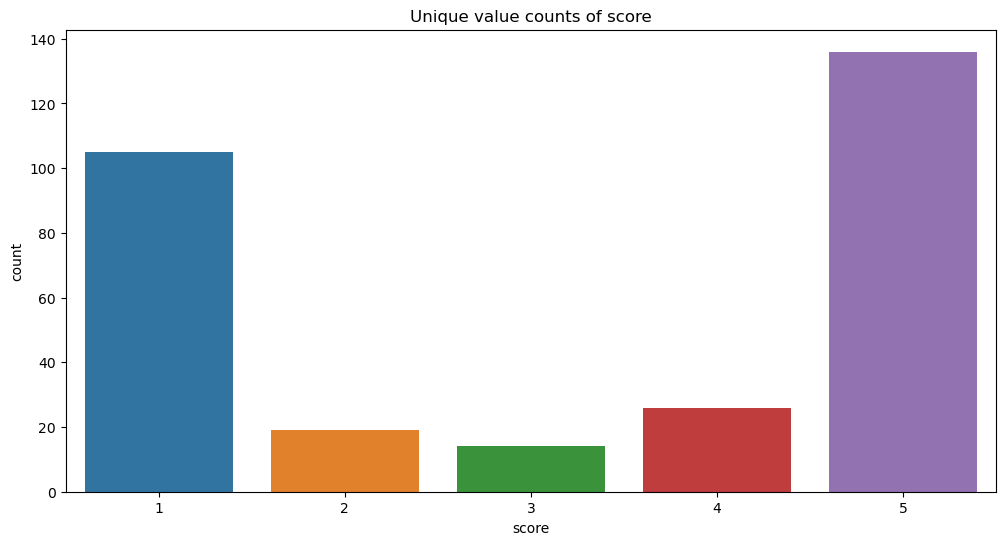

In [22]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of score')
sns.countplot(data=df, x='score')
plt.show()

# Outliers

In [23]:
user_engagement_df = df[['review_id', 'user_name', 'user_image', 'likes','review_created_version','created_at','app_version','score','comments']]
user_engagement_df.head()

,review_id,user_name,user_image,likes,review_created_version,created_at,app_version,score,comments
0,738b6d3a-2d7f-4a82-bfe2-dcf32591f944,NAHOM NIGUSSIE,https://play-lh.googleusercontent.com/a-/ALV-U...,1,0,2024-05-21 18:38:28,0,2,Slow and buggy crashed all the time need a lot...
1,e20abe49-8fe7-42fe-af3a-91399875b21a,Abbatu Ermias,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.04.23,2024-05-21 05:06:05,24.04.23,5,Awe ሃረፍ nawe
2,55c833c8-a942-47bb-aaaa-e022f39e28af,Habtsh Darge,https://play-lh.googleusercontent.com/a/ACg8oc...,0,0,2024-05-20 08:07:49,0,1,በጣም ቀፋፊ አፕ ነው ። ሰርቶ አያውቅም ። በጣም ብዙ ችግር አለበት ከአ...
3,d62d6d95-2900-4038-aa26-c9b42835c971,Usman,https://play-lh.googleusercontent.com/a/ACg8oc...,0,0,2024-05-19 16:27:13,0,1,This application is very bad . Please modify t...
4,20c4de51-f5cd-41f3-b21a-efdf8cb4463e,Eskender Million,https://play-lh.googleusercontent.com/a-/ALV-U...,1,24.04.23,2024-05-17 20:37:40,24.04.23,1,"It has a very complex, inconvenient to use, an..."


In [24]:
outlier_handler = OutlierHandler(user_engagement_df)

<Axes: >

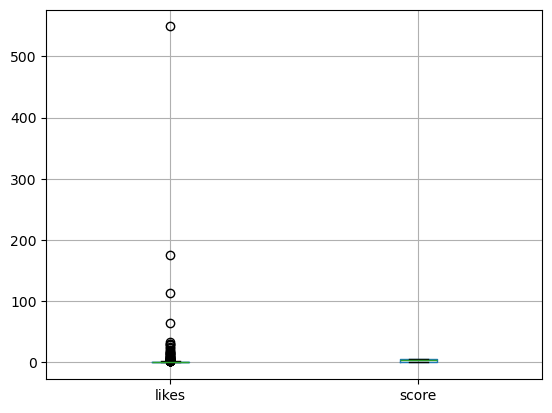

In [25]:
user_engagement_df.boxplot()